In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor, IsolationForest
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDOneClassSVM
from sklearn.neighbors import LocalOutlierFactor

In [4]:
def test_on_data(x_train, x_test, y_train, y_test):
    rf = RandomForestRegressor(
       n_estimators=1000,
       max_depth=7,
       n_jobs=-1,
       random_state=42)

    rf.fit(x_train, y_train)
    preds = rf.predict(x_test)
    return mean_squared_error(y_test, preds)

def test_on_data_cv(x, y, cv=5):
    rf = RandomForestRegressor(
       n_estimators=1000,
       max_depth=7,
       n_jobs=-1,
       random_state=42)

    scores = cross_val_score(rf, x, y, cv=cv, scoring='neg_root_mean_squared_error')
    scores
    return scores

def cv(x_train, x_test, y_train, y_test):
    rf = RandomForestRegressor(
       n_estimators=1000,
       max_depth=7,
       n_jobs=-1,
       random_state=42)

    rf.fit(x_train, y_train)
    preds = rf.predict(x_test)
    return mean_squared_error(y_test, preds)

In [2]:
df = pd.read_csv('sample_submission.csv')
df

,id,target,O2_1,O2_2,O2_3,O2_4,O2_5,O2_6,O2_7,NH4_1,...,NO3_5,NO3_6,NO3_7,BOD5_1,BOD5_2,BOD5_3,BOD5_4,BOD5_5,BOD5_6,BOD5_7
0,0,8.59,7.500,9.000,9.545,9.265,8.110,8.430,7.150,0.180,...,4.950,1.730,1.800,4.800,3.150,10.665,10.465,16.645,5.750,10.37
1,1,9.10,13.533,40.900,8.770,9.265,6.015,10.070,7.150,1.107,...,20.050,9.530,7.695,4.550,6.950,2.040,5.200,5.725,2.950,2.23
2,2,8.21,3.710,5.420,8.770,9.265,4.550,10.070,7.150,0.020,...,4.580,3.025,3.960,4.935,4.950,4.725,6.075,6.750,3.500,3.17
3,3,8.39,8.700,8.100,9.500,9.200,5.200,8.670,6.670,0.280,...,8.450,2.070,1.730,6.300,4.700,3.500,6.200,8.670,2.900,7.37
4,4,8.07,8.050,8.650,7.960,9.265,3.290,10.070,7.150,0.360,...,2.020,1.730,0.760,4.800,4.970,3.950,2.800,8.400,3.500,3.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,3495,8.08,6.250,8.300,7.795,9.265,5.690,8.555,6.335,0.565,...,14.575,0.636,1.640,4.235,4.100,2.800,3.950,7.695,3.540,2.50
3496,3496,8.09,6.630,6.630,8.370,7.600,0.636,8.430,7.150,1.300,...,4.580,1.730,1.800,4.900,3.150,2.040,6.075,8.415,2.155,2.90
3497,3497,9.95,8.367,8.433,8.770,6.170,5.800,10.400,7.200,0.430,...,20.050,1.440,1.800,4.867,4.833,4.725,4.950,8.400,6.625,4.20
3498,3498,9.52,10.000,6.630,9.545,9.265,3.290,8.980,2.310,0.300,...,20.050,9.530,7.695,10.700,5.400,4.725,3.300,6.750,6.625,5.00


In [6]:
x = df.copy()
y = x.pop('target')

In [32]:
rf = RandomForestRegressor(
       n_estimators=1000,
       max_depth=7,
       n_jobs=-1,
       random_state=42)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [33]:
rf.fit(x_train, y_train)
preds = rf.predict(x_test)
mean_squared_error(y_test, preds)

2.737320778903516

In [34]:
impos.append(rf.feature_importances_)

In [35]:
impos

[array([0.00424332, 0.47885096, 0.31461644, 0.00245816, 0.00672578,
        0.00525732, 0.0040995 , 0.00413285, 0.0048055 , 0.00725249,
        0.00341276, 0.00407521, 0.00465065, 0.00246935, 0.00162035,
        0.00312829, 0.00460861, 0.00184859, 0.00246355, 0.00344048,
        0.00493209, 0.00313715, 0.00235445, 0.00426537, 0.00277891,
        0.00301927, 0.00298994, 0.00892273, 0.00435798, 0.00371433,
        0.00300474, 0.00378935, 0.00380931, 0.07864096, 0.00350145,
        0.00262177]),
 array([0.00414904, 0.48424312, 0.35039173, 0.00303473, 0.00758264,
        0.00775397, 0.0053362 , 0.00583753, 0.00564955, 0.00473637,
        0.00445084, 0.00471366, 0.00363699, 0.01107527, 0.00205218,
        0.00431589, 0.00660517, 0.00314832, 0.0045499 , 0.00440043,
        0.00570168, 0.00431271, 0.00307685, 0.00400196, 0.00448951,
        0.0040445 , 0.00410214, 0.00886341, 0.00623909, 0.00557938,
        0.00542308, 0.00448512, 0.00318051, 0.00326474, 0.00277797,
        0.00279385]),
 arr

In [36]:
mean_fi = np.array(impos).mean(axis=0)

([<matplotlib.axis.XTick at 0x7fb06ed6d3f0>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23'),
  Text(24, 0, '24'),
  Text(25, 0, '25'),
  Text(26, 0, '26'),
  Text(27, 0, '27'),
  Text(28, 0, '28'),
  Text(29, 0, '29'),
  Text(30, 0, '30'),
  Text(31, 0, '31'),
  Text(32, 0, '32'),
  Text(33, 0, '33'),
  Text(34, 0, '34'),
  Text(35, 0, '35')])

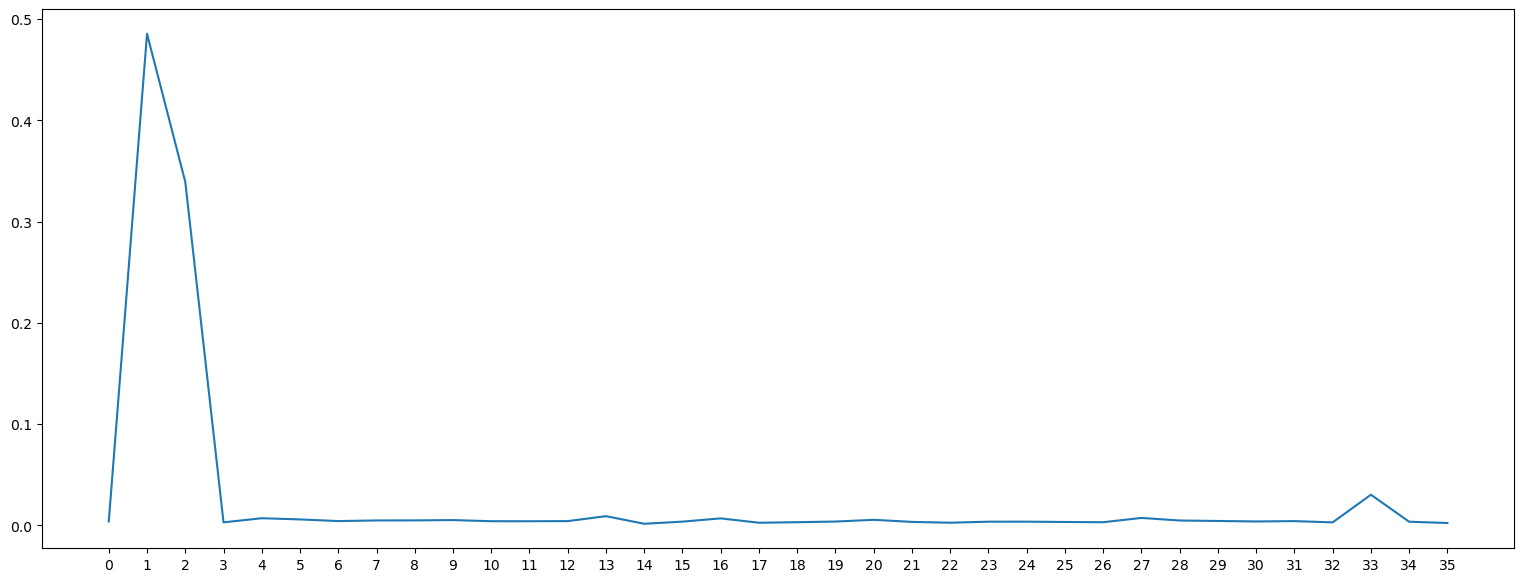

In [37]:
from matplotlib.pyplot import figure
figure(figsize=(19, 7))
plt.plot(mean_fi)
plt.xticks(np.arange(0, 36, step=1))

In [42]:
clf = SGDOneClassSVM(nu=1).fit(df.drop(['id'],axis=1))
len(np.where(clf.predict(df.drop(['id'],axis=1)) == -1)[0])
# Let's take a more stringent strategy

46

In [43]:
print(len(np.array(np.where(clf.predict(df.drop(['id'],axis=1))==-1))[0]))

46


In [46]:
df.drop(df.index[np.array(np.where(clf.predict(df.drop(['id'],axis=1))==-1))[0]], axis=0, inplace=True)
len(df)

3454

In [49]:
# Let's see if we can make isolation forest any more similar to rfr
       # n_estimators=1000,
       # max_depth=7,
       # n_jobs=-1,
       # random_state=42)


clf = IsolationForest(n_estimators=1000, n_jobs=-1, random_state=42).fit(df.drop(['id'],axis=1))
len(np.array(np.where(clf.predict(df.drop(['id'],axis=1))==-1))[0])

72

In [50]:
df.drop(df.index[np.array(np.where(clf.predict(df.drop(['id'],axis=1))==-1))[0]], axis=0, inplace=True)
len(df)

3382

In [51]:
data = df.drop(['id'], axis=1)
# Select a subset of features for visualization (excluding 'id')
selected_features = df.columns[2:]

In [68]:
# Create an instance of LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors=3, contamination=0.2)
# Fit the model and predict anomalies
predictions = lof.fit_predict(df[selected_features])
print(len(predictions[predictions == -1]))

anomaly_indices = np.where(predictions == -1)[0]

# Remove anomalies from the DataFrame
df_2 = df.copy()
df_2 = df_2.drop(index=df.index[anomaly_indices])
print(len(df))

# We basically annihilated the df :)
df_2.to_csv('sub20-lof02.csv', index=False)

677
3382


In [69]:
# Create an instance of LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors=3, contamination=0.1)
# Fit the model and predict anomalies
predictions = lof.fit_predict(df[selected_features])
# Find the indices of anomalies (outliers)
anomaly_indices = np.where(predictions == -1)[0]

# Remove anomalies from the DataFrame
df = df.drop(index=df.index[anomaly_indices])
print(len(df))
# We basically annihilated the df :)
df.to_csv('sub20-lof01.csv', index=False)

3043


In [100]:
impos = [pd.Series(i) for i in impos]

In [102]:
impos = pd.Series(impos)

In [113]:
fi_df = pd.DataFrame({'1':impos[1], '2':impos[2], '3':impos[3], '4':impos[4], '5':impos[5]})

In [120]:
fi_df.mean(axis=1).sort_values(ascending=True, inplace=True)

TypeError: 'NoneType' object is not subscriptable

In [129]:
features_inx = fi_df.mean(axis=1).sort_values(ascending=False)[:4]

In [141]:
features_inx = features_inx.index+1

Int64Index([2, 3, 34, 14], dtype='int64')

In [170]:
out_features = df.columns[features_inx.index+1]

In [171]:
out_features

Index(['O2_1', 'O2_2', 'BOD5_5', 'NH4_6'], dtype='object')

In [146]:
df_3 = df_2.copy()
df_3.iloc[:]=0
df_3[out_features] = df_2[out_features]
df_3['target'] = df_2['target']

In [173]:
df_3

,id,target,O2_1,O2_2,O2_3,O2_4,O2_5,O2_6,O2_7,NH4_1,...,NO3_5,NO3_6,NO3_7,BOD5_1,BOD5_2,BOD5_3,BOD5_4,BOD5_5,BOD5_6,BOD5_7
0,0,8.59,7.500,9.000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,16.645,0,0
2,0,8.21,3.710,5.420,0,0,0,0,0,0,...,0,0,0,0,0,0,0,6.750,0,0
3,0,8.39,8.700,8.100,0,0,0,0,0,0,...,0,0,0,0,0,0,0,8.670,0,0
4,0,8.07,8.050,8.650,0,0,0,0,0,0,...,0,0,0,0,0,0,0,8.400,0,0
5,0,8.12,9.000,9.000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,8.400,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3494,0,8.65,8.367,8.760,0,0,0,0,0,0,...,0,0,0,0,0,0,0,8.415,0,0
3495,0,8.08,6.250,8.300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,7.695,0,0
3496,0,8.09,6.630,6.630,0,0,0,0,0,0,...,0,0,0,0,0,0,0,8.415,0,0
3497,0,9.95,8.367,8.433,0,0,0,0,0,0,...,0,0,0,0,0,0,0,8.400,0,0


In [174]:
df_ex = df.copy()
df_ex.iloc[:]=0
df_ex[out_features] = df[out_features]
df_ex['target'] = df['target']

/var/folders/lb/05l0197j4wdgmqspj9s7bgjc0000gn/T/ipykernel_1084/432703621.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_ex.iloc[:]=0


In [176]:
df_ex.to_csv('sub21_normal.csv' ,index=False)
df_3.to_csv('sub21_less.csv' ,index=False)